CART(Classification and Regression Trees)

Sınıflandırma ve regresyon problemleri için kullanılan bir karar ağacı algoritmasıdır.

Amaç veriseti içindeki karmaşık yapıları basit karar yapılarına dönüştürmektir. Heterojen verisetleri belirlenmiş bir hedef değişkenine göre alt gruplara ayrılır.

Genellenebilirlik kaygısı yok ise kullanılabilir.

In [3]:
# "Hitters" verisetini yüklüyoruz.
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df.head()

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
# Veriseti içindeki eksik verileri siliyoruz.
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [5]:
# Verisetini tanımak için incelemeler yapıyoruz.

In [6]:
# Verisetindeki sayısal sütunlar için istatistiksel özet bilgilerini inceliyoruz.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [7]:
# Veriseti içinde eksik değer kalıp kalmadığını inceliyoruz.
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [8]:
# Kategorik değişkenlerin dummy değişkenlere dönüştürülmesi işlemini gerçekleştiriyoruz.
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False


In [9]:
# Verisetindeki bağımlı ve bağımsız değişkenleri belirliyoruz.
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [11]:
# Verisetini train ve test setlerine ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [12]:
# X_train ve X_test'ten sadece "Hits" sütununu seçerek yeni DataFrame'ler oluşturuyoruz.
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [14]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [16]:
# Modeli oluşturduk ve eğittik.
model = DecisionTreeRegressor(min_samples_split = 2)
cart_model = model.fit(X_train, y_train)

In [17]:
# Model üzerinde tahmin işlemini gerçekleştirdik.
y_train_pred = cart_model.predict(X_train)
y_test_pred = cart_model.predict(X_test)

In [18]:
# Eğitim ve Test Setleri için Hata Kareler Ortalamasının Karekökü değeri olan "RMSE" değerini hesapladık.
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Eğitim Seti RMSE Değeri:', rmse_train)
print('Test Seti RMSE Değeri:', rmse_test)

Eğitim Seti RMSE Değeri: 231.67017321152872
Test Seti RMSE Değeri: 468.49579052913884


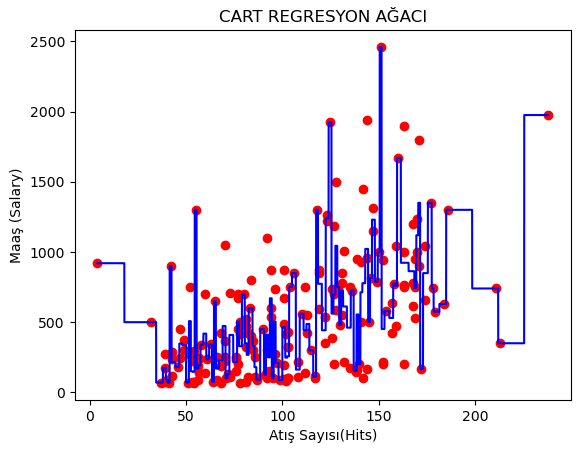

In [22]:
# Eğitim verisetindeki "Hits" değerlerine karşılık gelen tahmini doğruyu görselleştiriyoruz.
import matplotlib.pyplot as plt
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESYON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

Model Tuning

In [23]:
# Cross Validation (Çapraz Doğrulama) işlemini gerçekleştirmek için nesne oluşturuyoruz.
from sklearn.model_selection import GridSearchCV
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [24]:
# Cross Validation nesnesi oluşturduktan sonra modeli oluşturduk ve eğittik.
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [25]:
# Model için en iyi parametreler aşağıdaki gibidir.
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [27]:
# Final Modelini kuruyoruz.
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [28]:
# Final modeli üzerinde tahmin işlemini gerçekleştirdik.
y_pred_train = cart_tuned.predict(X_train)
y_pred_test = cart_tuned.predict(X_test)

In [29]:
# Model tuning işleminden sonra Hata Kareler Ortalamasının Karekökü değeri olan "RMSE" değerini tekrar hesapladık.
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test =np.sqrt(mean_squared_error(y_test, y_pred_test))

print('Eğitim Seti RMSE Değeri:', rmse_train)
print('Test Seti RMSE Değeri:', rmse_test)

Eğitim Seti RMSE Değeri: 359.2003873993075
Test Seti RMSE Değeri: 423.406689243066
